#Hand Written Recognition

# Importing the required packages

*   List item
*   List item



In [29]:

#impoting libs:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# load the MNIST dataset

In [3]:
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [4]:
## load_data --return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


There are 60000 images in the training data.Each image is 28*28

In [5]:
print(test_digits.shape)

(10000, 28, 28)


there are 10 classes from class 0 to class 9

In [6]:
print(train_labels.shape)

(60000,)


class wise images count

In [7]:
type(train_labels)

numpy.ndarray

In [8]:
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

image count for each label in test data

In [9]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

EDA

Text(0.5, 1.0, 'Digit5')

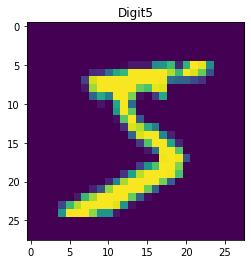

In [10]:
plt.imshow(train_digits[0])
plt.title("Digit" + str(train_labels[0]))

Text(0.5, 1.0, 'Digit5')

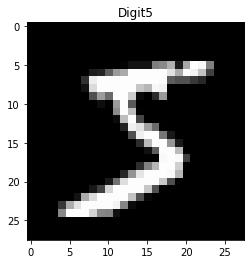

In [11]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit" + str(train_labels[0]))

In [12]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

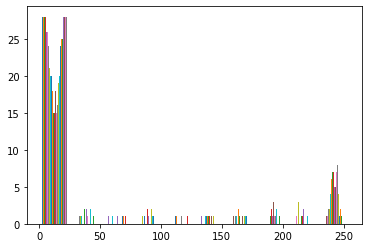

In [13]:
plt.hist(train_digits[0])
plt.show()

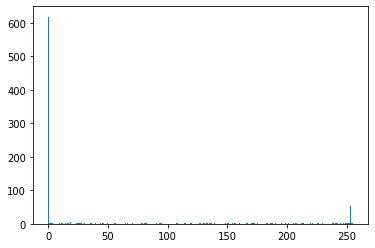

In [14]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

(array([652.,   9.,   9.,   4.,  11.,   5.,   7.,  10.,  14.,  63.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

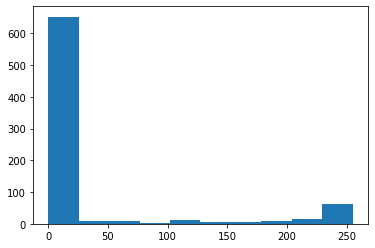

In [15]:
##pixel distribution for digit 7
plt.hist(train_digits[15].flat)

In [16]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [17]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples

array([18796, 25180, 35795, 40922, 25584,  2542, 47495, 30302, 11672,
       16001, 21611, 37640, 23155, 13483, 50617,  4078])

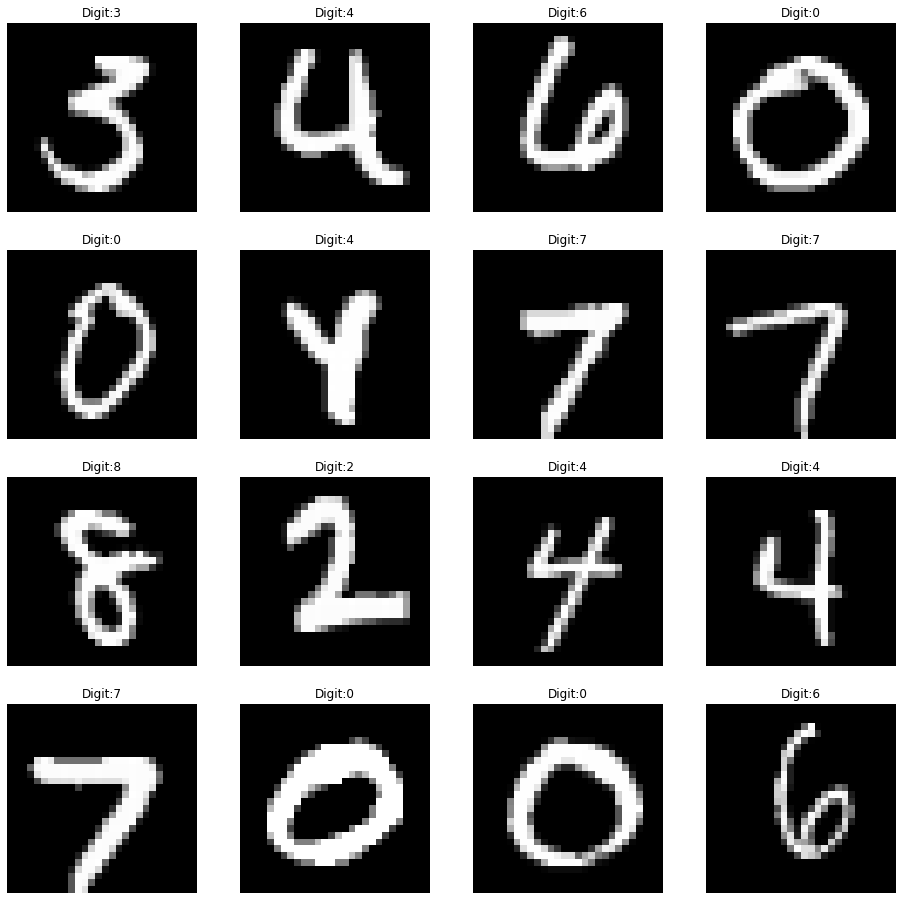

In [18]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit:" + str(train_labels[i]))
  plt.axis('off')
  j+=1

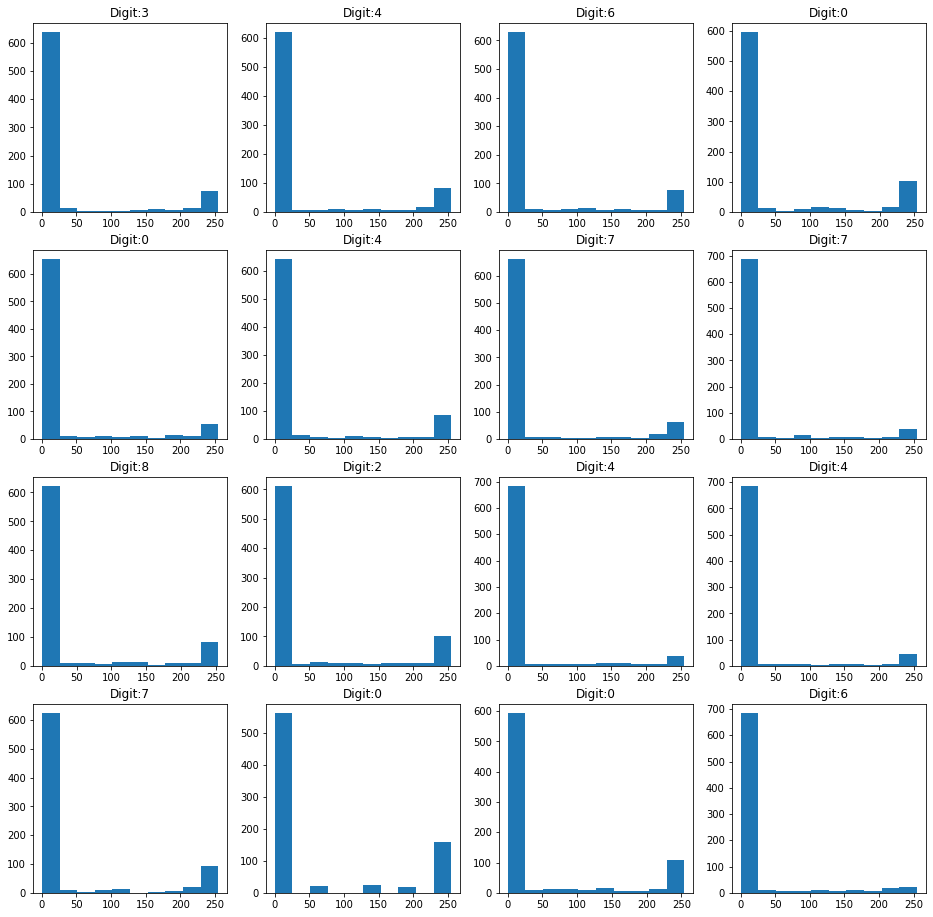

In [19]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit:" + str(train_labels[i]))
  j+=1

Pre-processing

scaling:

In [20]:
train_digits_sc= train_digits/255.0
test_digits_sc=test_digits/255.0

In [21]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [22]:
#Convert labels into CATEGORICAL VALUES:
from keras.utils import to_categorical
train_labels_cat=to_categorical(train_labels)

In [23]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
test_labels_cat=to_categorical(test_labels)
test_labels_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Splitting and Validating the data:


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=54)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


Building and Training the MODEL:
- we need to take 1d array as input for DENSE layer
- How many Hidden Layer?
- How many Neuron in each layer?
- what is the ACTIVATION FUNCTION for the Hiddem=n layers?
- How many neurons in the OUTPUT layer?
- What is the ACTIVATION function for output layer?

In [26]:
#Build the Model:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [27]:
#Now, we are creating the skeleton(the structure of the model)
#how many hidden layers, how many neurons etc.
model= Sequential()
#first layer:
model.add(Flatten(input_shape=(28,28))) #input layer
#784 pixel values as input to DENSE . 128 Neurons in the Layers.
#hidden layers:
model.add(Dense(128,activation='relu')) #728*28+128(bias) #128 bias for 128 nodes
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
#final layer:
model.add(Dense(10,activation='softmax')) #10 because--> there are 10 classes in the output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

Compile the MODEL
- what is the LOSS Func?
- What is the OPTIMIZER?
- What are the METRICS?

In [30]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])


Train the model:

In [31]:
history = model.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 169us/step - loss: 0.2721 - accuracy: 0.9163 - val_loss: 0.1632 - val_accuracy: 0.9522
Epoch 2/10
54000/54000 [==============================] - 8s 157us/step - loss: 0.1250 - accuracy: 0.9637 - val_loss: 0.1145 - val_accuracy: 0.9678
Epoch 3/10
54000/54000 [==============================] - 9s 158us/step - loss: 0.0945 - accuracy: 0.9728 - val_loss: 0.1191 - val_accuracy: 0.9635
Epoch 4/10
54000/54000 [==============================] - 9s 166us/step - loss: 0.0787 - accuracy: 0.9777 - val_loss: 0.1005 - val_accuracy: 0.9723
Epoch 5/10
54000/54000 [==============================] - 9s 171us/step - loss: 0.0661 - accuracy: 0.9808 - val_loss: 0.0813 - val_accuracy: 0.9780
Epoch 6/10
54000/54000 [==============================] - 9s 162us/step - loss: 0.0538 - accuracy: 0.9839 - val_loss: 0.0997 - val_accuracy: 0.9748
Epoch 7/10
54000/54000 [==============================] - 9s 16

In [32]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.11371643202995256, 0.9753000140190125]

In [33]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [34]:

model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[6.5608815e-18, 3.3840782e-12, 1.5859700e-09, 2.3734820e-13,
        7.0243351e-12, 2.9856720e-18, 9.3802478e-29, 1.0000000e+00,
        1.8654453e-17, 1.7413514e-10]], dtype=float32)

In [35]:
model.predict(test_digits_sc[:10])

array([[6.5608314e-18, 3.3840719e-12, 1.5859609e-09, 2.3734731e-13,
        7.0243217e-12, 2.9856720e-18, 9.3802478e-29, 1.0000000e+00,
        1.8654384e-17, 1.7413482e-10],
       [2.4045351e-17, 7.9166493e-11, 1.0000000e+00, 4.2434803e-10,
        5.3662719e-16, 1.4383922e-14, 3.8684454e-21, 2.5559143e-11,
        1.8221283e-17, 1.9269851e-22],
       [5.1772776e-08, 9.9985516e-01, 2.8592231e-05, 2.1738063e-06,
        7.7508894e-06, 1.1973078e-06, 4.4126340e-05, 3.8423572e-05,
        2.2326363e-05, 1.3835282e-07],
       [1.0000000e+00, 1.0172808e-20, 2.0348686e-13, 8.2555582e-13,
        1.2535563e-19, 1.3262102e-12, 4.9351277e-11, 5.6221585e-14,
        2.3610899e-15, 3.4536762e-11],
       [5.8832474e-12, 7.3628770e-09, 2.1613464e-09, 6.1720170e-15,
        9.9999917e-01, 3.0807849e-11, 3.8904069e-08, 2.5457572e-08,
        1.8788375e-10, 8.7177142e-07],
       [5.6319675e-12, 9.9999881e-01, 1.2988949e-07, 2.9144389e-09,
        4.6481929e-08, 8.1702195e-10, 5.7847366e-08, 9.27

In [36]:

model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [37]:
model.predict_classes(test_digits_sc[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [38]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[6.5608815e-18, 3.3840782e-12, 1.5859700e-09, 2.3734820e-13,
        7.0243351e-12, 2.9856720e-18, 9.3802478e-29, 1.0000000e+00,
        1.8654453e-17, 1.7413514e-10]], dtype=float32)

In [39]:
history.history
#this is a dictionary

{'accuracy': [0.91627777,
  0.9637037,
  0.9728148,
  0.9776852,
  0.9807963,
  0.9839074,
  0.98514813,
  0.9872778,
  0.98862964,
  0.9898889],
 'loss': [0.2721151477150895,
  0.12499273253108065,
  0.09451409404014272,
  0.07868001621651152,
  0.06614514093182085,
  0.0537558010261661,
  0.05022665715816482,
  0.04420621917258379,
  0.04047635152135734,
  0.035546071890070044],
 'val_accuracy': [0.9521666765213013,
  0.9678333401679993,
  0.9635000228881836,
  0.9723333120346069,
  0.9779999852180481,
  0.9748333096504211,
  0.9735000133514404,
  0.9736666679382324,
  0.9726666808128357,
  0.9758333563804626],
 'val_loss': [0.16316339865326882,
  0.11454738343258698,
  0.11910788846264282,
  0.10045186733826995,
  0.08129317161378762,
  0.09969470377576847,
  0.10326805605444436,
  0.09952906614619618,
  0.10263850107595014,
  0.10573144296301568]}

In [40]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

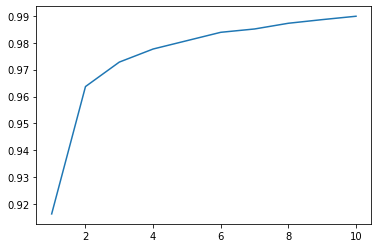

In [41]:
plt.plot(range(1,11),history.history['accuracy'])

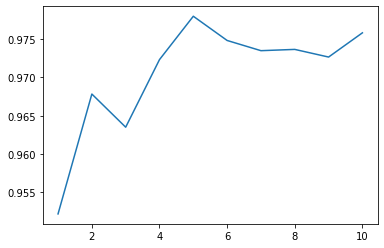

In [43]:
plt.plot(range(1,11),history.history['val_accuracy'])

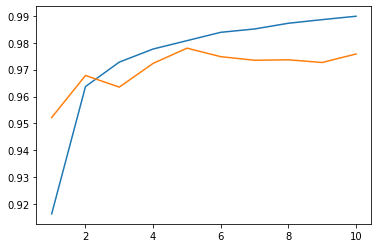

In [44]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])